[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.3492186.svg)](https://doi.org/10.5281/zenodo.3492186)

[Walkthrough $-$ trackpy 0.4.2 documentation](http://soft-matter.github.io/trackpy/v0.4.2/tutorial/walkthrough.html)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(5, 5))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import trackpy as tp

In [3]:
working_directory = "Experimental Trajectory"
filename = "20071220-LatB-control-top.pk"

In [4]:
%%bash -s "$working_directory" "$filename"

texttocsv() {
    for file in "$@"
    do
        echo 'x,y,frame' > ${file%.*}.csv &&
        awk '{print $2"," $3","$1}' ${file} >> ${file%.*}.csv
    done
}

cd "$1" && texttocsv "$2"

In [5]:
os.chdir(working_directory)
f = pd.read_csv(filename[:filename.find('.')]+".csv")
f = f.astype({"frame":int})
f.head()

,x,y,frame
0,28.058699,22.461051,2
1,21.202623,31.645317,2
2,27.749346,22.280942,3
3,27.823394,22.520252,5
4,16.965482,40.349987,6


In [6]:
tp.quiet()  
t = tp.link(f, 5, memory=3)

t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 3025
After: 14


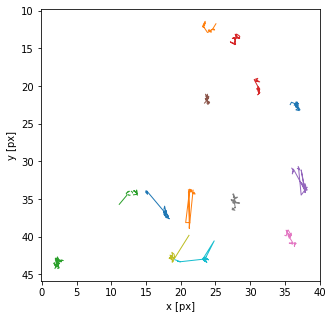

In [30]:
plot = plt.figure()
tp.plot_traj(t1);

In [31]:
plot.savefig("trajectories.pdf")

In [15]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13968707489172016514
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1434543719
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18275222559726457495
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]
